## Логистическая регрессия

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)
import math 

Реализуйте обучение логистической регрессии с $L^1$ и $L^2$ регуляризацией с помощью метода Stochastic Gradient Descent (SGD)

#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

In [25]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=50, penalty='l2'):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
                 
                    
         
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        m = len(X)
        t0, t1 = 5., 50  # learning schedule hyperparameters

        self.theta = np.random.randn(3,1)  # random initialization

        for epoch in range(self.max_epoch):
            p = np.random.permutation(m)
            for idx in p:
                random_index = np.random.randint(m)
                xi = X[[idx], :]
                yi = y[idx]
                sg = 1/(1+math.exp(-np.dot(xi,self.theta)))
                gradients = (sg - yi)*xi
                self.theta = self.theta - self.alpha * gradients.T
              
        return self
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        y_hat =  np.sign(np.dot(X,self.theta))
        
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        return y_hat_proba
    def plot_addline(self, xi, xmin = -4, xmax = 8, label = 'Class line'):
        y = (-self.theta[2]-self.theta[0]*xi[0])/self.theta[1]
        plt.plot(xi[0],y, '--b', linewidth = 3, label = label)
        return self
        

        
       

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

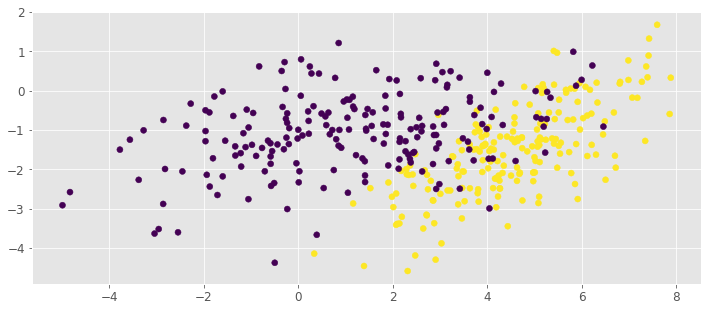

In [26]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)



In [27]:
add = np.ones(400).reshape(400, 1)
X_new = np.hstack((X,add))


In [28]:
model = MySGDClassifier()
model.fit(X_new, y)
model.theta


array([[ 1.24745322],
       [-1.36511072],
       [-5.60988376]])

In [29]:
XXX = np.array([[ -2,0,1]])
model.predict(XXX)

array([[-1.]])

In [30]:
xx = np.array([-1,8])
yy = np.array([(-model.theta[2]-model.theta[0]*xx[0])/model.theta[1],(-model.theta[2]-model.theta[0]*xx[1])/model.theta[1]])
yy = np.squeeze(yy)
xx,yy

(array([-1,  8]), array([-5.02328263,  3.20101656]))

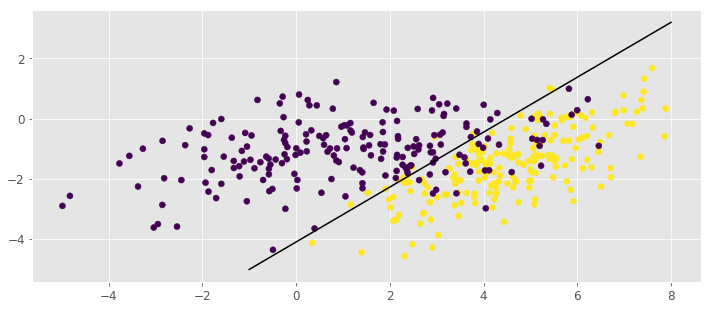

In [31]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xx, yy, "k-")

In [291]:
## Your Code Here

## Анализ сходимости

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/эпохи (выбрать одно) для разных `alpha`.

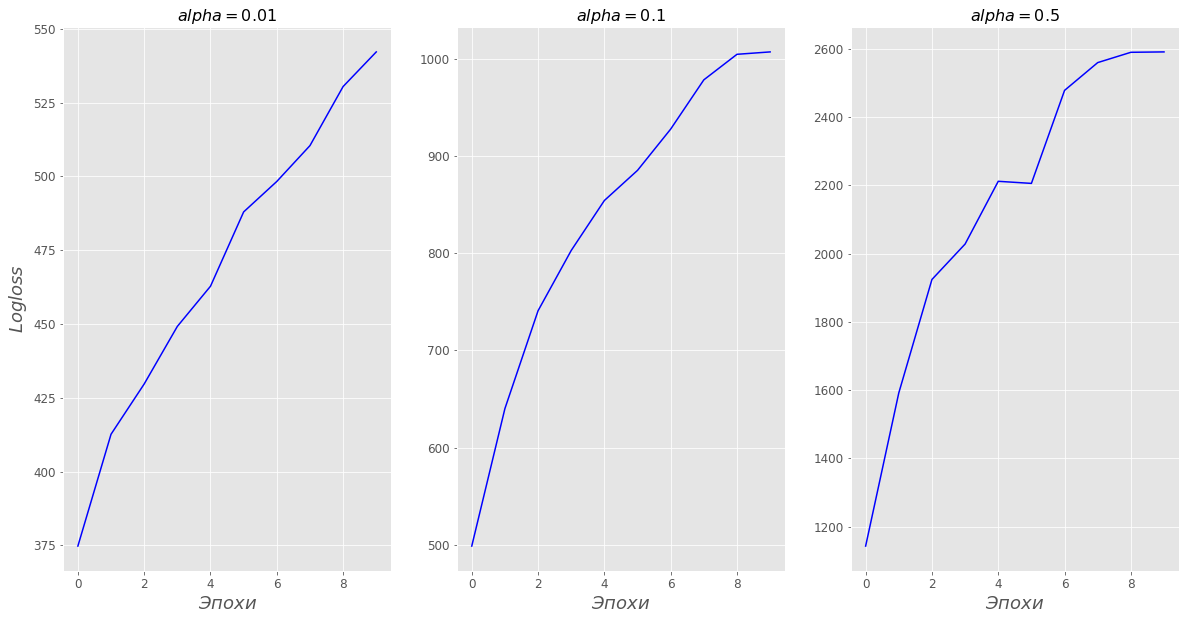

In [58]:
def plot_gd_examples():
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    theta_path_bgd = []
       
    def plot_gradient_descent(theta, alpha, theta_path=None):
       
        m = len(X_new)
        n_iterations = 10
        loss_v = []; iterations =[] 
        for epoch in range(n_iterations):
            loss=0
            p = np.random.permutation(m)
            for idx in p:
                random_index = np.random.randint(m)
                xi = X_new[[idx], :]
                yi = y[idx]
                sg = 1/(1+math.exp(-np.dot(xi,theta)))
                gradients = (sg - yi)*xi
                theta = theta - alpha * gradients.T
                loss = loss + math.log1p(1+math.exp(-np.dot(xi,theta)))
            loss_v.append(loss)
            iterations.append(epoch)
                
        plt.plot(iterations,loss_v, "b-")
        plt.xlabel("$Эпохи$", fontsize=18)
        plt.title(r"$alpha = {}$".format(alpha), fontsize=16)

    np.random.seed(42)
    theta = np.random.randn(3,1)  

    plt.figure(figsize=(20,10))
    plt.subplot(131); plot_gradient_descent(theta, alpha=0.01)
    plt.ylabel("$Log loss$", fontsize=18)
    plt.subplot(132); plot_gradient_descent(theta, alpha=0.1, theta_path=theta_path_bgd)
    plt.subplot(133); plot_gradient_descent(theta, alpha=0.5)
    
    plt.show()
    
plot_gd_examples()

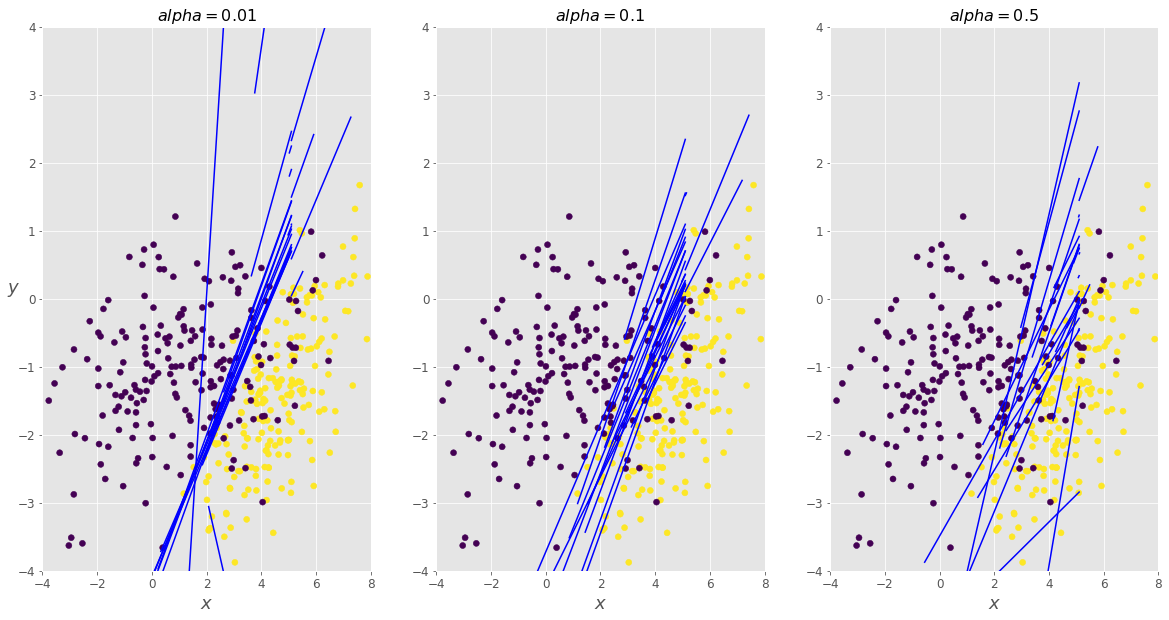

In [32]:
def plot_gd_examples():
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    theta_path_bgd = []
       
    def plot_gradient_descent(theta, alpha, theta_path=None):
       
        m = len(X_new)
       
        n_iterations = 25
        for epoch in range(n_iterations):
           
            p = np.random.permutation(m)
            for idx in p:
                random_index = np.random.randint(m)
                xi = X_new[[idx], :]
                yi = y[idx]
                sg = 1/(1+math.exp(-np.dot(xi,theta)))
                gradients = (sg - yi)*xi
                theta = theta - alpha * gradients.T
                xx = np.array([xi[0][0],X_new[0][0]])
                yy = np.array([(-theta[2]-theta[0]*xi[0][0])/theta[1],(-theta[2]-theta[0]*X_new[0][0])/theta[1]])
              
            plt.plot(xx, yy, "b-")
                    
        plt.xlabel("$x$", fontsize=18)
        plt.axis([-4, 8, -4, 4])
        plt.title(r"$alpha = {}$".format(alpha), fontsize=16)

    np.random.seed(42)
    theta = np.random.randn(3,1)  

    plt.figure(figsize=(20,10))
    plt.subplot(131); plt.scatter(X[:,0], X[:,1], c=y);plot_gradient_descent(theta, alpha=0.01)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.subplot(132); plt.scatter(X[:,0], X[:,1], c=y); plot_gradient_descent(theta, alpha=0.1, theta_path=theta_path_bgd)
    plt.subplot(133);plt.scatter(X[:,0], X[:,1], c=y); plot_gradient_descent(theta, alpha=0.5)
    
    plt.show()
    
plot_gd_examples()

In [ ]:
Получается, что сходимость алгоритма лучше при альфе равной 0.01